In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import func_stat
from typing import List

In [2]:
### Create resid column ###
def residCol(df,colSpectrZ, colPhotoZ,colResid):
    df[colResid]=(df[colSpectrZ]-df[colPhotoZ])/(df[colSpectrZ]+1)
    return df

In [3]:
def addResults(statsTabTest,statsTabTrain, dirExp:str,expNums:List[int]):
    if not all(statsTabTest.columns==['Exp','N obj','meanNorm','sigmaNorm','nmadNorm','outliers15Norm']):
        print('statsTabTest columns do not match the requirements')
        return
    if not all(statsTabTrain.columns==['Exp','N obj','meanNorm','sigmaNorm','nmadNorm','outliers15Norm']):
        print('statsTabTrain columns do not match the requirements')
        return
    for exp in expNums:
        expDir='ex'+str(exp).zfill(3)
        rec={'Exp':expDir}
        try:
            for f in os.listdir(os.path.join(dirExp,expDir)):
                case='METAPHOR_teststats'
                if f.startswith(case):
                    df=pd.read_csv(os.path.join(dirExp,expDir,f),index_col='Indicator')
                    rec['meanNorm']=df.loc['meanNorm'][0]
                    rec['sigmaNorm']=df.loc['sigmaNorm'][0]
                    rec['nmadNorm']=df.loc['nmadNorm'][0]
                    rec['outliers15Norm']=df.loc['outliers15Norm'][0]
                    rec['N obj']=df.loc['EstimatesInRange'][0]
                    statsTabTest=statsTabTest.append(rec,ignore_index=True)
                case='METAPHOR_trainstats'
                if f.startswith(case):
                    df=pd.read_csv(os.path.join(dirExp,expDir,f),index_col='Indicator')
                    rec['meanNorm']=df.loc['meanNorm'][0]
                    rec['sigmaNorm']=df.loc['sigmaNorm'][0]
                    rec['nmadNorm']=df.loc['nmadNorm'][0]
                    rec['outliers15Norm']=df.loc['outliers15Norm'][0]
                    rec['N obj']=df.loc['EstimatesInRange'][0]
                    statsTabTrain=statsTabTrain.append(rec,ignore_index=True)
        except:
            print('No directory '+expDir+' found')
    return statsTabTest,statsTabTrain

In [4]:
dirExp=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experiments'
expNums=range(183,250)

In [5]:
statsTabTest=pd.DataFrame(columns=['Exp','N obj','meanNorm','sigmaNorm','nmadNorm','outliers15Norm'])
statsTabTrain=pd.DataFrame(columns=['Exp','N obj','meanNorm','sigmaNorm','nmadNorm','outliers15Norm'])
statsTabTest,statsTabTrain=addResults(statsTabTest,statsTabTrain, dirExp=dirExp,expNums=expNums)

In [6]:
d=statsTabTrain.merge(statsTabTest,on='Exp',suffixes=['_train','_test'])

In [7]:
import numpy as np
from scipy import polyval, polyfit
from scipy import interpolate

In [9]:
def interpol(d1,e,case,numObj=14000):
    x=d1['N obj_train']
    y=d1[e+'_'+case]
    a, b, c,g = polyfit(x,y, 3)
    y_pred = polyval([a, b, c,g], x)
    x_out = np.linspace(0, numObj+500, 20)
    y_pred = polyval([a, b, c,g], x_out)
    return x, y, x_out, y_pred

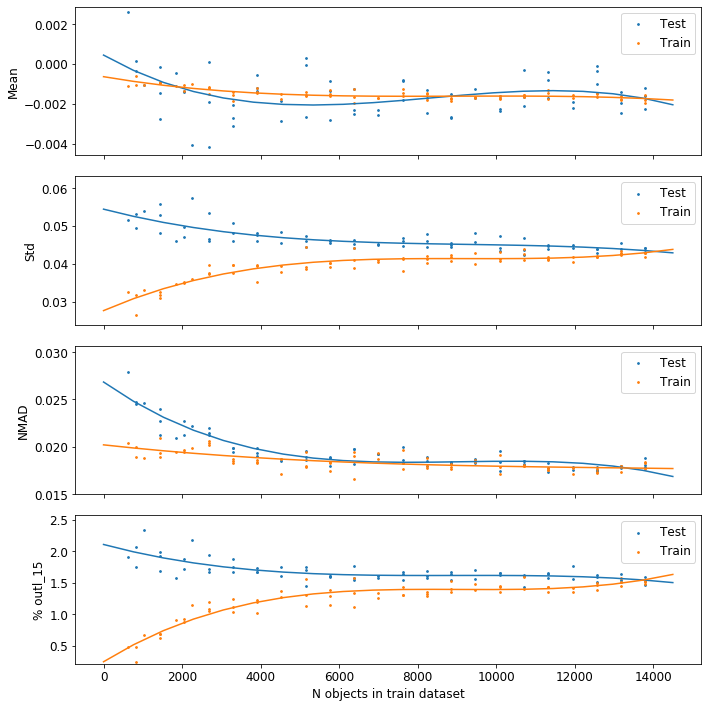

In [10]:
d1=d.sort_values(by='N obj_train')[3:]
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(4,1,figsize=(10,10),sharex=True)
est=['meanNorm','sigmaNorm','nmadNorm','outliers15Norm']
estLabels=['Mean','Std','NMAD','% outl_15']
for i,e in enumerate(est):
    ax=axs[i]
    ax.scatter(d1['N obj_train'],d1[e+'_test'],label='Test',s=3)
    ax.scatter(d1['N obj_train'],d1[e+'_train'],label='Train',s=3)
    ax.legend()
    x, y, x_out, y_pred=interpol(d1,e,'test',numObj=14000)
    ax.plot( x_out, y_pred, 'b-',c='#1f77b4' )
    
    x, y, x_out, y_pred=interpol(d1,e,'train',numObj=14000)
    ax.plot( x_out, y_pred, 'b-',c='#ff7f0e' )
    
    yminlim=min(d1[e+'_test'].min(),d1[e+'_train'].min())
    if yminlim<0:
        yminlim*=1.1
    else:
        yminlim*=0.9
    ax.set_ylim(yminlim,1.1*max(d1[e+'_test'].max(),d1[e+'_train'].max()))
    ax.set_ylabel(estLabels[i])
axs[-1].set_xlabel('N objects in train dataset')
plt.tight_layout()

In [11]:
dirPlots=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\plots'

In [13]:
fig.savefig(os.path.join(dirPlots,"learningCurve.png"), dpi=300)

In [81]:
d1

,Exp,N obj_train,meanNorm_train,sigmaNorm_train,nmadNorm_train,outliers15Norm_train,N obj_test,meanNorm_test,sigmaNorm_test,nmadNorm_test,outliers15Norm_test
19,ex202,617.0,-0.001125,0.032482,0.020358,0.486224,19979.0,0.002610,0.051580,0.027883,1.907002
64,ex247,823.0,-0.000596,0.026489,0.018931,0.243013,19773.0,0.000131,0.053263,0.024686,2.073535
63,ex246,823.0,-0.001030,0.031726,0.019974,0.486027,19773.0,-0.000363,0.049576,0.024503,1.749861
18,ex201,1029.0,-0.001031,0.033130,0.018847,0.680272,19567.0,-0.001057,0.054045,0.024667,2.335565
62,ex245,1441.0,-0.000896,0.032416,0.020977,0.624566,19155.0,-0.001471,0.052876,0.023959,1.983816
...,...,...,...,...,...,...,...,...,...,...,...
23,ex206,13181.0,-0.001631,0.042736,0.018024,1.509749,7415.0,-0.001942,0.045618,0.017775,1.550910
24,ex207,13181.0,-0.001795,0.043325,0.017947,1.570442,7415.0,-0.001385,0.042716,0.018023,1.510452
22,ex205,13799.0,-0.001943,0.042887,0.018386,1.507356,6797.0,-0.001194,0.044252,0.018828,1.530087
21,ex204,13799.0,-0.001578,0.041669,0.018272,1.478368,6797.0,-0.001593,0.044186,0.018045,1.588936


In [63]:
d.sort_values(by='N obj_train')

,Exp,N obj_train,nmadNorm_train,N obj_test,nmadNorm_test
66,ex249,205.0,0.018012,20391.0,0.038251
65,ex248,205.0,0.020460,20391.0,0.048143
20,ex203,205.0,0.018670,20391.0,0.044880
19,ex202,617.0,0.020358,19979.0,0.027883
64,ex247,823.0,0.018931,19773.0,0.024686
...,...,...,...,...,...
23,ex206,13181.0,0.018024,7415.0,0.017775
24,ex207,13181.0,0.017947,7415.0,0.018023
22,ex205,13799.0,0.018386,6797.0,0.018828
21,ex204,13799.0,0.018272,6797.0,0.018045


In [12]:
d.columns

Index(['Exp', 'N obj_train', 'meanNorm_train', 'sigmaNorm_train',
       'nmadNorm_train', 'outliers15Norm_train', 'N obj_test', 'meanNorm_test',
       'sigmaNorm_test', 'nmadNorm_test', 'outliers15Norm_test'],
      dtype='object')